<span style="font-size:2em;">
<div class="alert alert-success">
    <center>Srijesh reddy yarram AA5750 Homework Week #5</center> <br>
    <center>Understanding Perceptrons</center>  <br>
    <center> >> Run this Notebook in your tf2 environment! << </center>
</div>
</span>

 

---

<span style="font-size:1.5em;">
<div class="alert alert-success">
    <center>AA5750 Debugging Code Cells</center> <br>
    <center>Helpful information to have if you seek assisstance</center>
</div>
</span>


In [1]:
# Students - Include this cell in all your notebooks
# BE SURE TO PUT YOUR NAME 
name = "Srijesh Reddy Yarram"      # <--------- BE SURE TO PUT YOUR NAME ON THIS ASSIGNMENT

In [2]:
# Students - Include this cell in all your notebooks
# Helps with debugging your problems and questions

import datetime as dt
t0=dt.datetime.today()  # Record the start time
print()
print("My Name is: srijesh reddy yarram")

# Helps with debugging your problems and questions
print("\n===== DEBUGGING INFORMATION ======")
print("It is now: ",dt.datetime.today().strftime("%m/%d/%Y %I:%M:%S %p"))

import sys
print("Enviroment Path:    ",sys.executable)
print("Computer Type:      ",sys.platform)

import os
print("os.name:            ",os.name)

#The portable way of getting the home directory in Python is
from os.path import expanduser
home = expanduser("~")
print("Home Directory:     ",home)
print("Juputer Config Dir:  ", end = '')    
!jupyter --config-dir

print("\n===========\nConda info:")
!conda info


My Name is: srijesh reddy yarram

===== DEBUGGING INFORMATION ======
It is now:  12/04/2022 08:42:14 PM
Enviroment Path:     /Users/srijesh/opt/anaconda3/envs/tf2/bin/python
Computer Type:       darwin
os.name:             posix
Home Directory:      /Users/srijesh
Juputer Config Dir:  /Users/srijesh/.jupyter

Conda info:

     active environment : base
    active env location : /Users/srijesh/opt/anaconda3
            shell level : 1
       user config file : /Users/srijesh/.condarc
 populated config files : /Users/srijesh/.condarc
          conda version : 22.9.0
    conda-build version : 3.22.0
         python version : 3.9.13.final.0
       virtual packages : __osx=10.14.6=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /Users/srijesh/opt/anaconda3  (writable)
      conda av data dir : /Users/srijesh/opt/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/osx-

In [3]:
# Cleans up output somewhat
# Skip running this cell if you want to see warning messages
#
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn  # Dangerously ignore all warning messages....

# Or Selectively   This does not seem to work??
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

#Note: You may want to see these warnings.  It is up to you.

---

<span style="font-size:2em;">
<div class="alert alert-success">
    <bold>
    <center>An Example Perceptron Learning Solution Notebook</center> 
    </bold>
</div>
</span>

---

#  Source this code start out from:

<!--BOOK_INFORMATION-->
<a href="https://www.packtpub.com/product/machine-learning-for-opencv/9781783980284" target="_blank"><img align="left" src="https://static.packt-cdn.com/products/9781783980284/cover/smaller" style="height: 150px; background: white; padding: 1px; border: 1px solid black; margin-right:10px;"></a>
*This notebook contains an excerpt from the book [Machine Learning for OpenCV](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv) by Michael Beyeler.
The code is released under the [MIT license](https://opensource.org/licenses/MIT),
and is available on [GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*Note that this excerpt contains only the raw code - the book is rich with additional explanations and illustrations.
If you find this content useful, please note the book can be found here: 
[the book](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv)!*



# Understanding Perceptrons

In the 1950s, American psychologist and artificial intelligence researcher Frank Rosenblatt invented an algorithm that would automatically learn the optimal weight coefficients $w_0$ and $w_1$ needed to perform an accurate binary classification: the perceptron learning rule.

Rosenblatt's original perceptron algorithm can be summed up as follows:

1. Initialize the weights to zero or some small random numbers.
2. For each training sample $s_i$, perform the following steps:
   1. Compute the predicted target value $ŷ_i$.
   2. Compare $ŷ_i$ to the ground truth $y_i$, and update the weights accordingly:
      - If the two are the same (correct prediction), skip ahead.
      - If the two are different (wrong prediction), push the weight coefficients $w_0$ and $w_1$ towards the positive or negative target class respectively.

## Implemeting our first perceptron

Perceptrons are easy enough to be implemented from scratch. We can mimic the typical OpenCV or scikit-learn implementation of a classifier by creating a `Perceptron` object. This will allow us to initialize new perceptron objects that can learn from data via a `fit` method and make predictions via a separate `predict` method.

When we initialize a new perceptron object, we want to pass a learning rate (`lr`) and the number of iterations after which the algorithm should terminate (`n_iter`):

In [4]:
import numpy as np
class Perceptron(object):

    def __init__(self,lr=0.01,n_iter=10):
        
        self.lr=lr
        self.n_iter=n_iter
    """ Constructor
        
        Parameters
        ----------
        lr : float
            Learning rate.
        n_iter : int
            Number of iterations after which the algorithm should
            terminate.
        self.lr = lr
        self.n_iter = n_iter 
      """
        
    def predict(self, X):
        """Predict target labels
        
        Parameters
        ----------
        X : array-like
            Feature matrix, <n_samples x n_features>
            
        Returns
        -------
        Predicted target labels, +1 or -1.
        
        Notes
        -----
        Must run `fit` first.
        """
        # Whenever the term (X * weights + bias) >= 0, we return
        # label +1, else we return label -1
        return np.where(np.dot(X, self.weights) + self.bias >= 0.0,
                        1, -1)
        
    def fit(self,X,y):
        """Fit the model to data
        
        Parameters
        ----------
        X : array-like
            Feature matrix, <n_samples x n_features>
        y : array-like
            Vector of target labels, <n_samples x 1>
        """
        self.weights = np.zeros(X.shape[1])
        self.bias = 0.0
        for _ in range(self.n_iter):
            for xi, yi in zip(X, y):
                delta = self.lr * (yi - self.predict(xi))
                self.weights += delta * xi
                self.bias += delta
            print(delta)
            print(self.weights)
            print(self.bias)
            plt.figure(figsize=(10, 6))
            plot_decision_boundary(p, X, y)    # Be sure this gets definded first
            plt.xlabel('x1')
            plt.ylabel('x2')

## Generating a test dataset

To test our perceptron classifier, we need to create some mock data. Let's keep things simple for now and generate 100 data samples (`n_samples`) belonging to one of two blobs (`center`s), again relying on scikit-learn's `make_blobs` function:

In [5]:
#from sklearn.datasets.samples_generator import make_blobs
# Above Update to below 2021
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2,
                  cluster_std=2.2, random_state=42)

In [6]:
print("X shape:", X.shape)
print("X shape:", y.shape)

X shape: (100, 2)
X shape: (100,)


So X is a two dimensional array of 100 items (so 100 x 2 array). y is 100 values for each X. <br>Lets look at the first 11 items in X:

In [7]:
# See some of X
X[0:10]

array([[-3.56338095,  8.60583638],
       [ 7.02259157,  4.2915342 ],
       [-3.70683962,  9.25831583],
       [ 6.44841119,  6.14611425],
       [ 5.14029069,  4.84888374],
       [-1.71412729, 12.39796657],
       [ 5.24859859,  3.79297283],
       [ 1.22841929,  2.12400823],
       [-3.37183556,  5.79455324],
       [-4.35547617,  8.3340189 ]])

In [8]:
# Y tells which dataset each X item is in: Either set "0" or set "1".
# See all 100 of y
y

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Adjust the labels so they're either +1 or -1 (that is what the perceptron needs to learn the correct dataset each X item is in]:

In [9]:
y = 2 * y - 1
y

array([-1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1])

#### Visualize the dataset

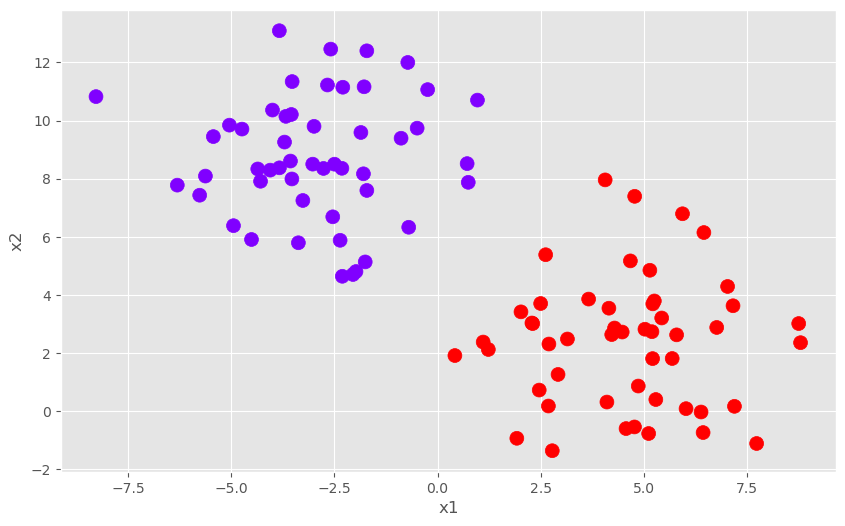

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap=plt.cm.get_cmap('rainbow', 2))  # Gives nice colors
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('perceptron-data.png')

Above, we can clearly see the datasets are **lineraly seperable**.

## Applying the perceptron to the linearly separable data

We can instantiate our perceptron object similar to other classifiers we encountered within this class:

In [14]:
p = Perceptron(lr=0.1, n_iter=10)

0.0
[ 2.20091094 -0.4798926 ]
0.2
0.0
[ 2.20091094 -0.4798926 ]
0.2
0.0
[ 2.20091094 -0.4798926 ]
0.2
0.0
[ 2.20091094 -0.4798926 ]
0.2
0.0
[ 2.20091094 -0.4798926 ]
0.2
0.0
[ 2.20091094 -0.4798926 ]
0.2
0.0
[ 2.20091094 -0.4798926 ]
0.2
0.0
[ 2.20091094 -0.4798926 ]
0.2
0.0
[ 2.20091094 -0.4798926 ]
0.2
0.0
[ 2.20091094 -0.4798926 ]
0.2


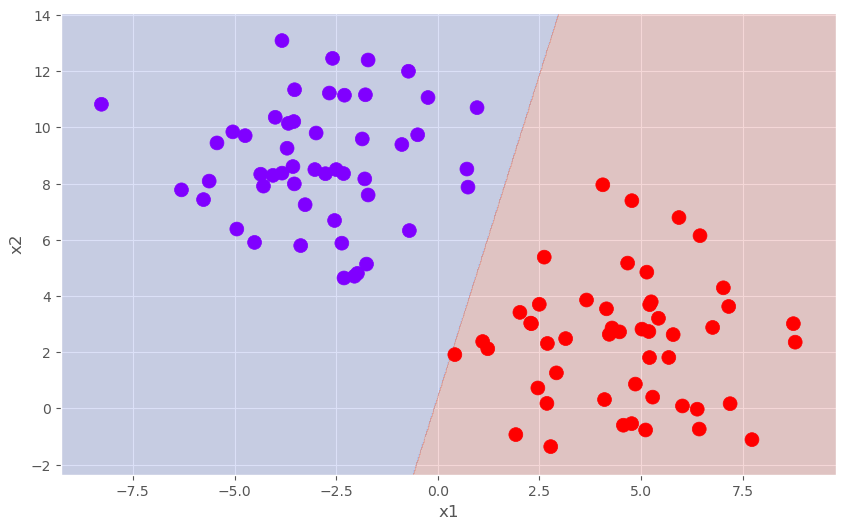

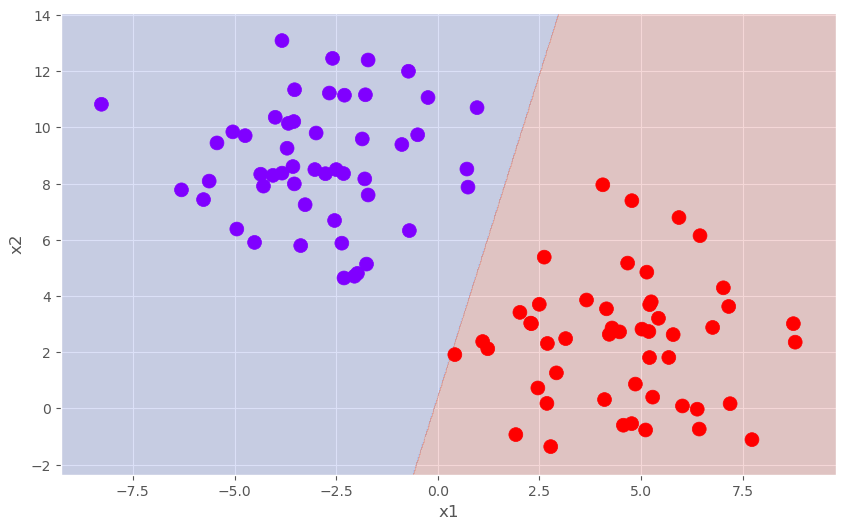

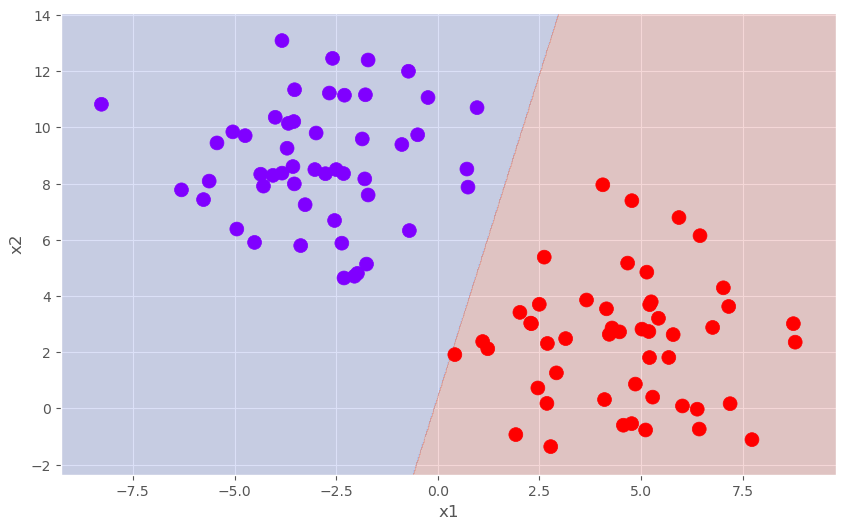

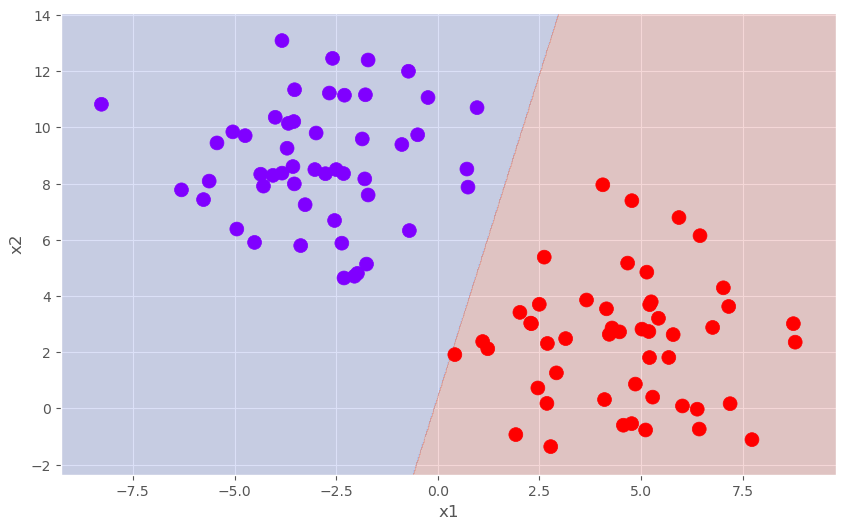

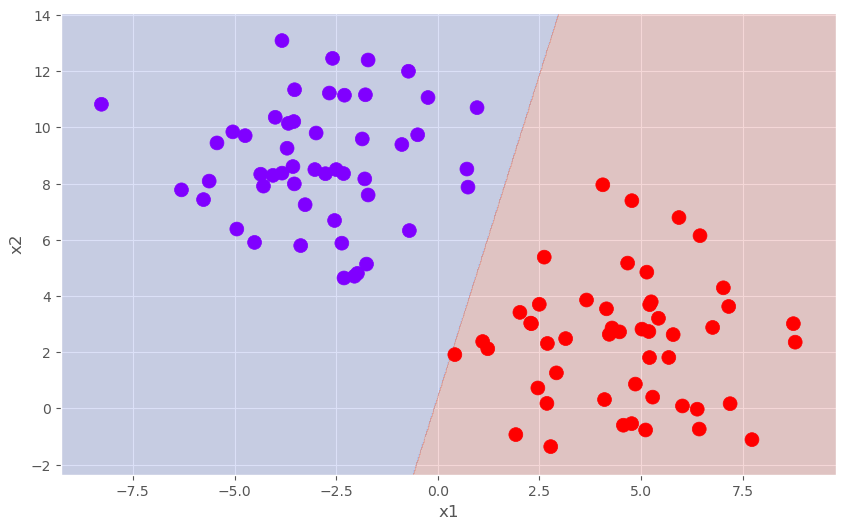

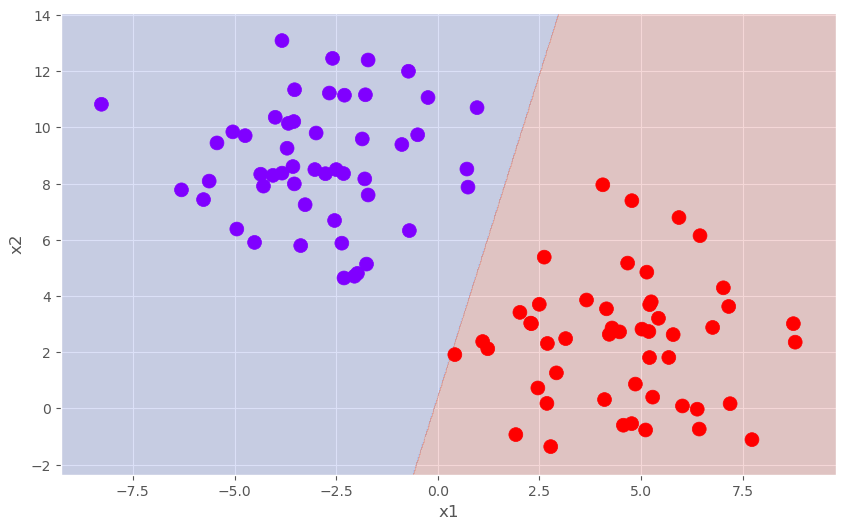

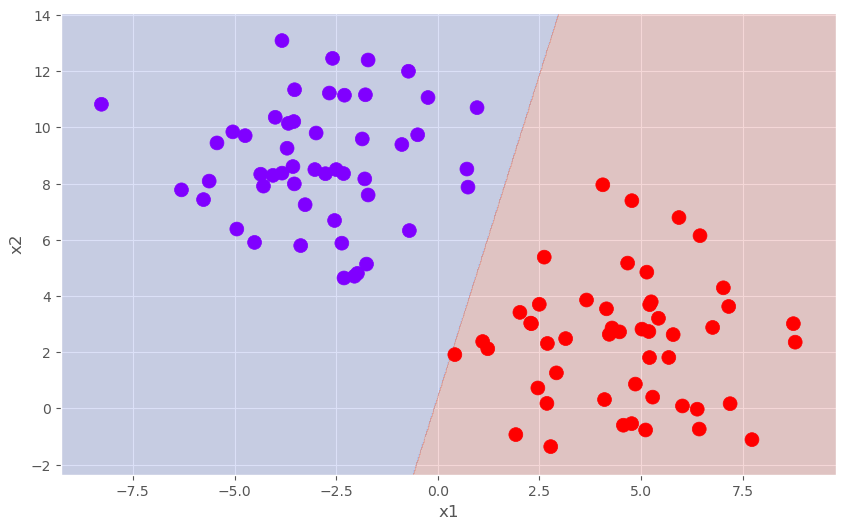

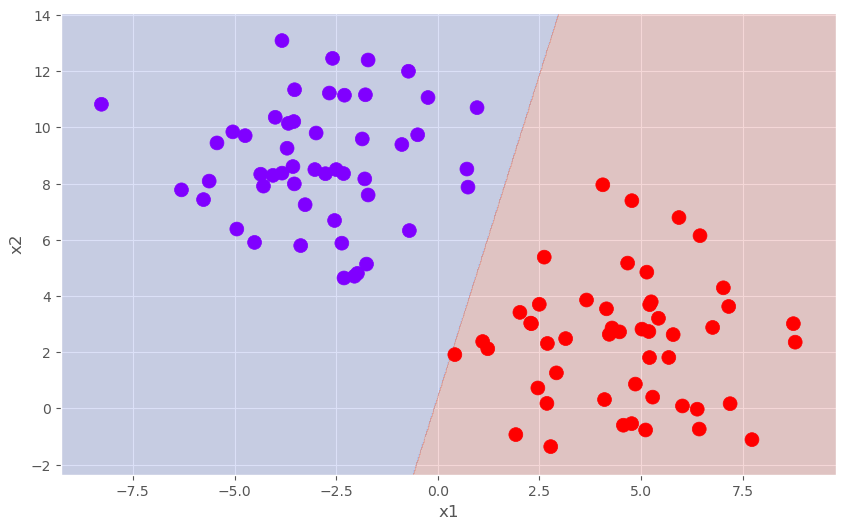

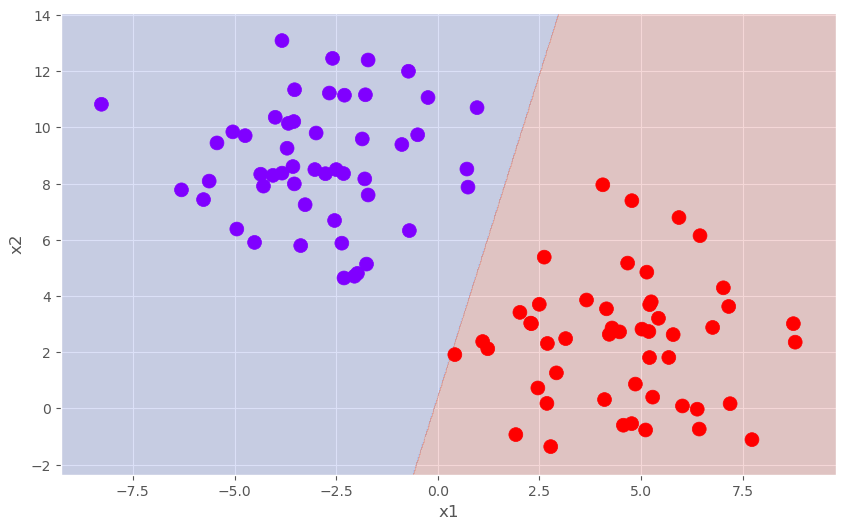

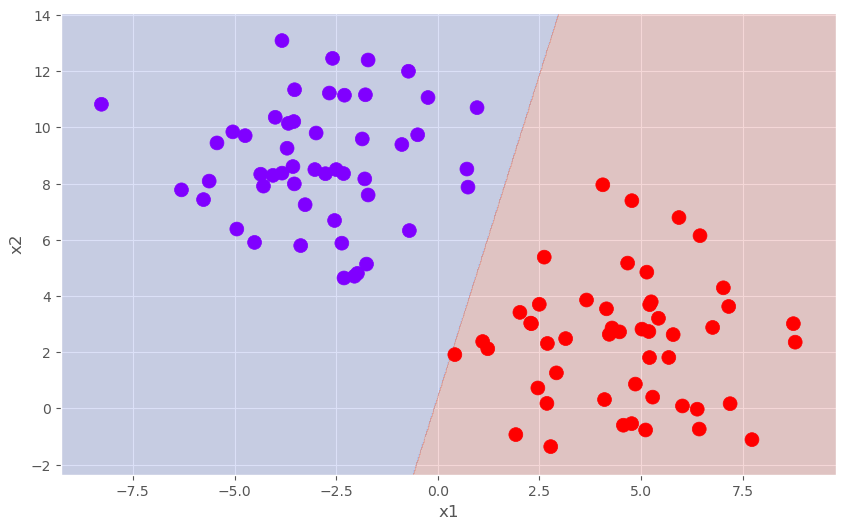

In [15]:
p.fit(X, y)

Let's have a look at the learned weights:

In [16]:
p.weights

array([ 2.20091094, -0.4798926 ])

In [17]:
p.bias

0.2

If we plug these values into our equation for $ϕ$, it becomes clear that the perceptron learned
a decision boundary of the form $2.2 x_1 - 0.48 x_2 + 0.2 >= 0$.

## Evaluating the perceptron classifier

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(p.predict(X), y)

1.0

Great! We got 100% accuracy. This is expected since the data is <b>lineraly seperable</b>.

In [13]:
def plot_decision_boundary(classifier, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    zz = classifier.predict(X_hypo)
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.2)
    plt.scatter(X_test[:, 0], X_test[:, 1], 
                c=y_test, cmap=plt.cm.get_cmap('rainbow', 2), s=100)

Lets plot the decision boundary. The line should 100% seperate the two **lineraly seperable** datasets.

Text(0, 0.5, 'x2')

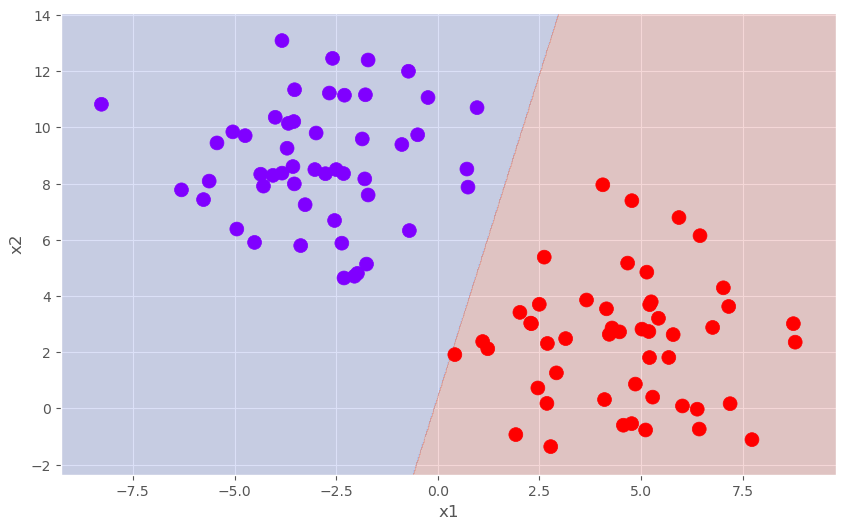

In [20]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(p, X, y)
plt.xlabel('x1')
plt.ylabel('x2')

## Applying the perceptron to data that is not linearly separable

Since the perceptron is a linear classifier, you can imagine that it would have trouble trying
to classify data that is **not linearly separable**. We can test this by increasing the spread
(`cluster_std`) of the two blobs in our toy dataset so that the two blobs start overlapping:

In [21]:
X, y = make_blobs(n_samples=100, centers=2,
                  cluster_std=3.2, random_state=42)  # std of 3.2 gives a very slight overlap
y = 2 * y - 1

Text(0, 0.5, 'x2')

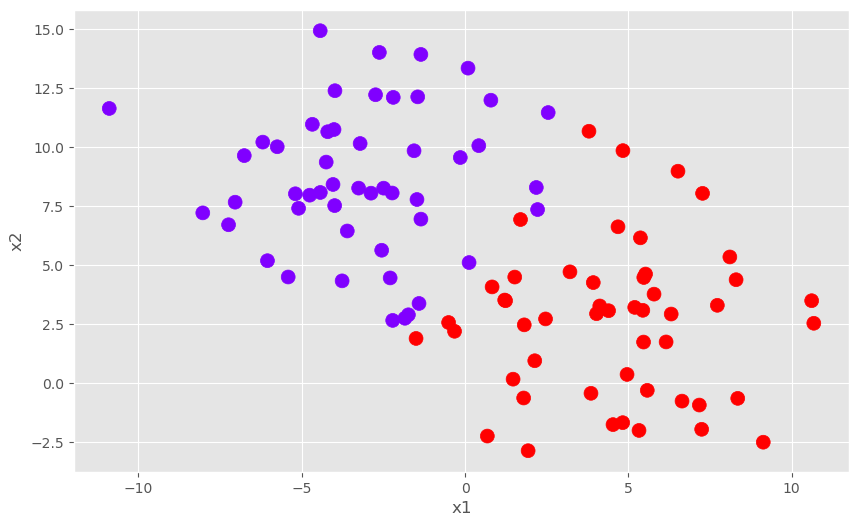

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap=plt.cm.get_cmap('rainbow', 2))
plt.xlabel('x1')
plt.ylabel('x2')

So what would happen if we applied the perceptron classifier to this dataset?

0.0
[ 2.77840644 -0.98415076]
0.4000000000000001
0.0
[ 3.1517625 -0.331816 ]
1.0
0.0
[ 2.52573375 -0.5776387 ]
1.5999999999999999
0.0
[ 2.87450059 -0.94682123]
1.9999999999999998
0.0
[ 3.22326743 -1.31600376]
2.4
0.0
[ 3.57203427 -1.68518629]
2.8000000000000003
0.0
[ 3.69565161 -0.87437828]
3.400000000000001
0.0
[ 3.65430864 -1.62186783]
3.600000000000001
0.0
[ 3.75333676 -1.83257711]
4.000000000000001
0.0
[ 3.87695411 -1.0217691 ]
4.600000000000001


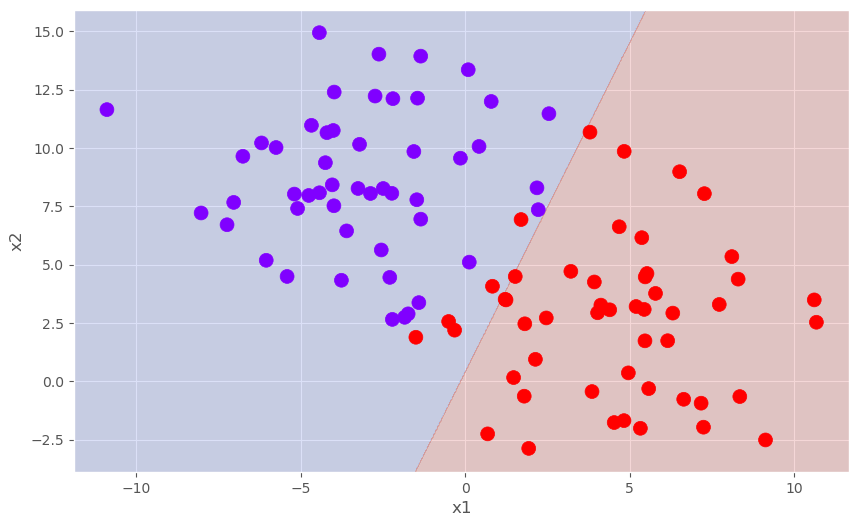

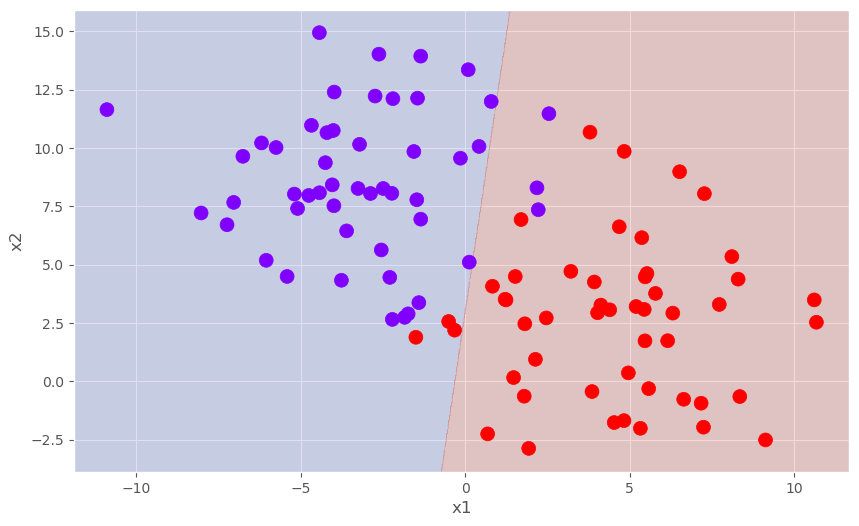

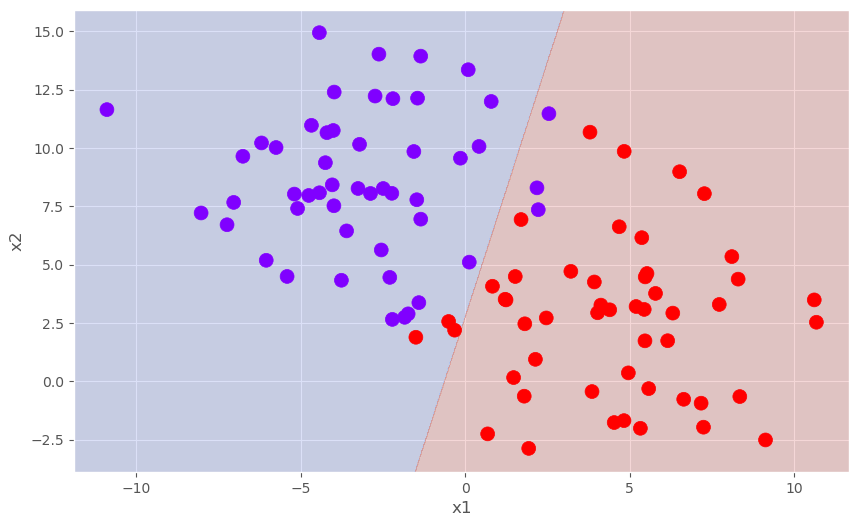

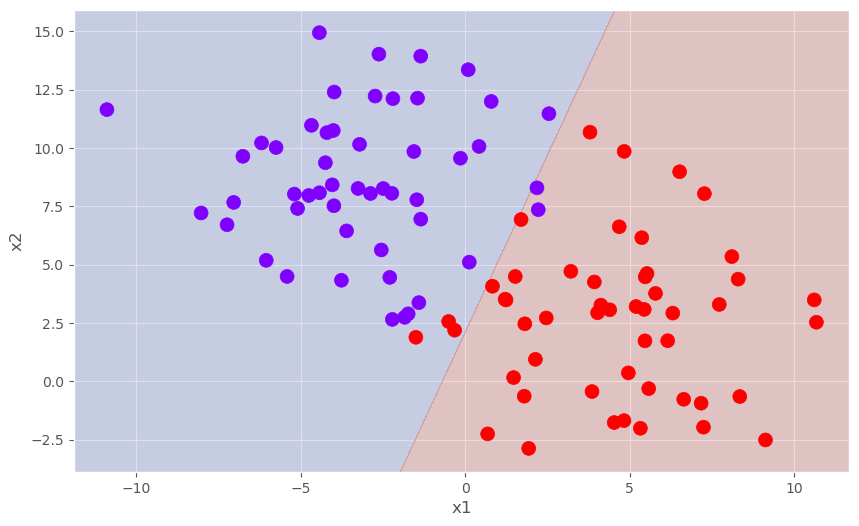

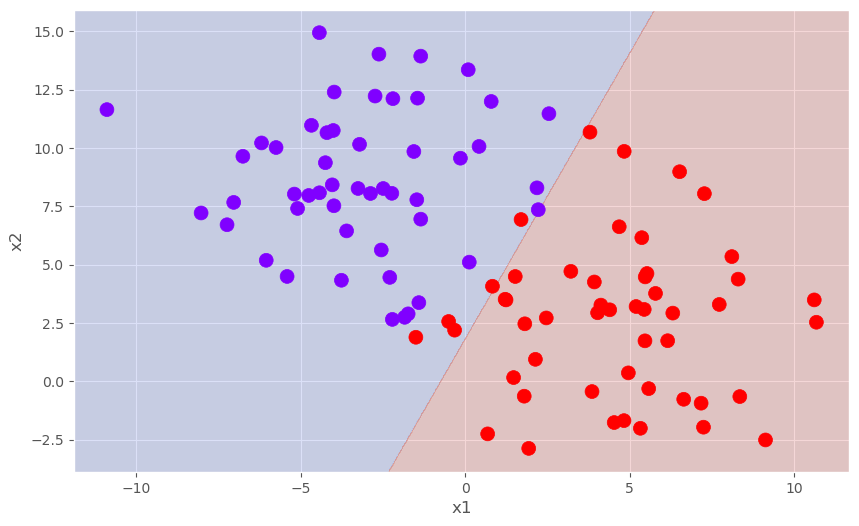

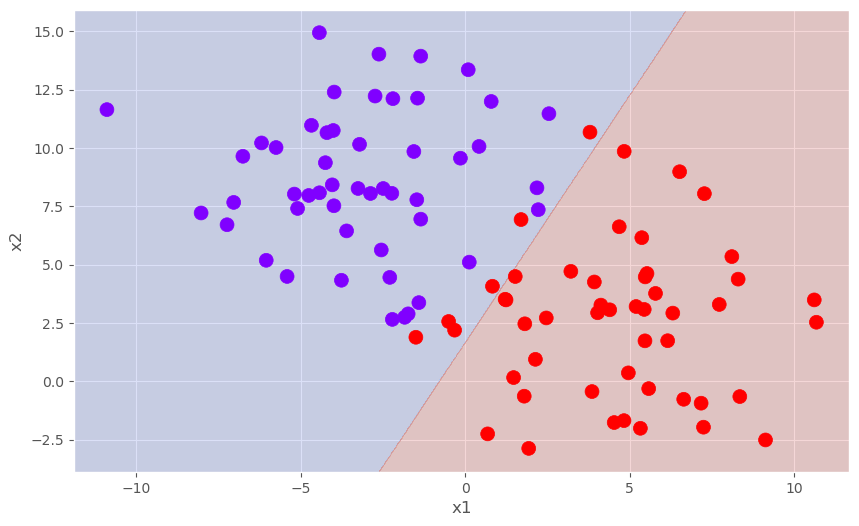

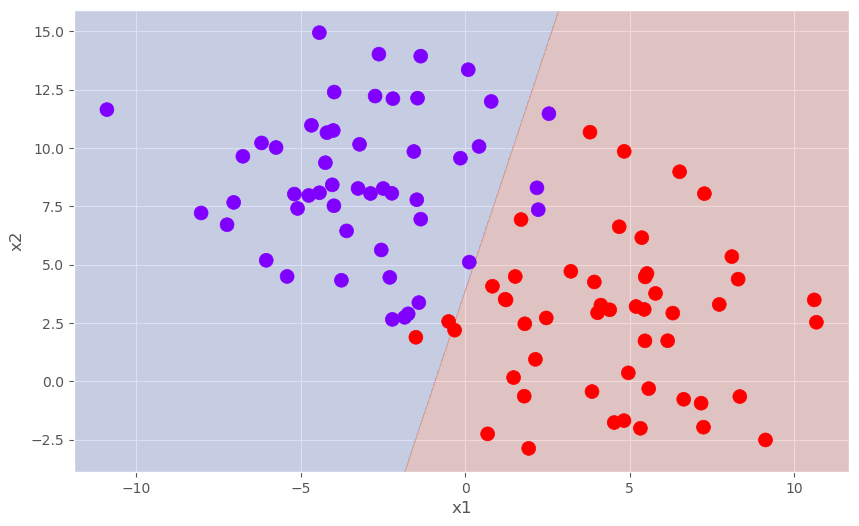

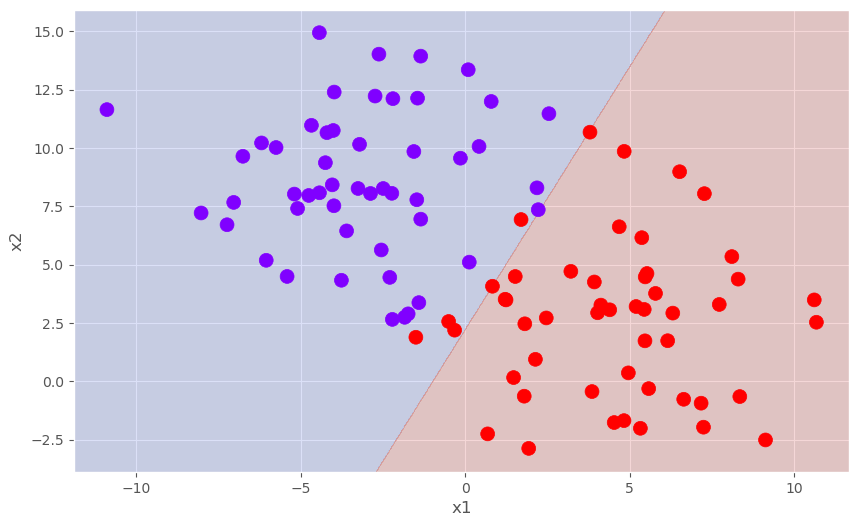

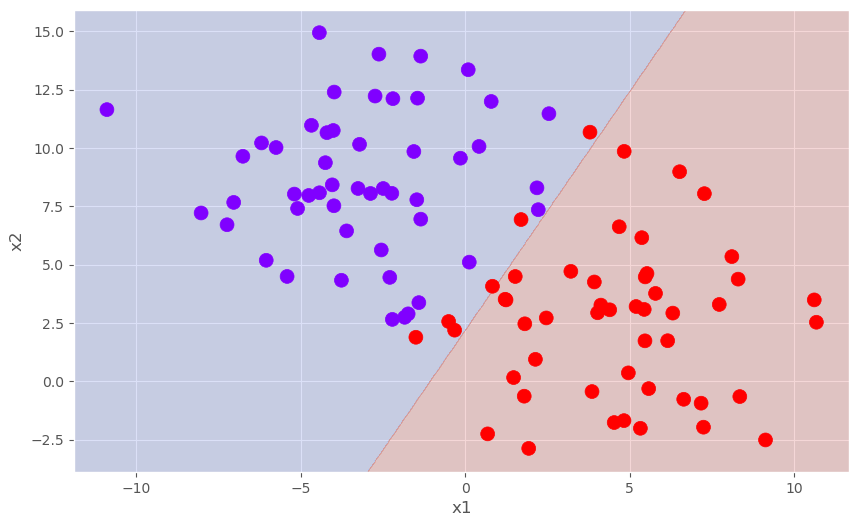

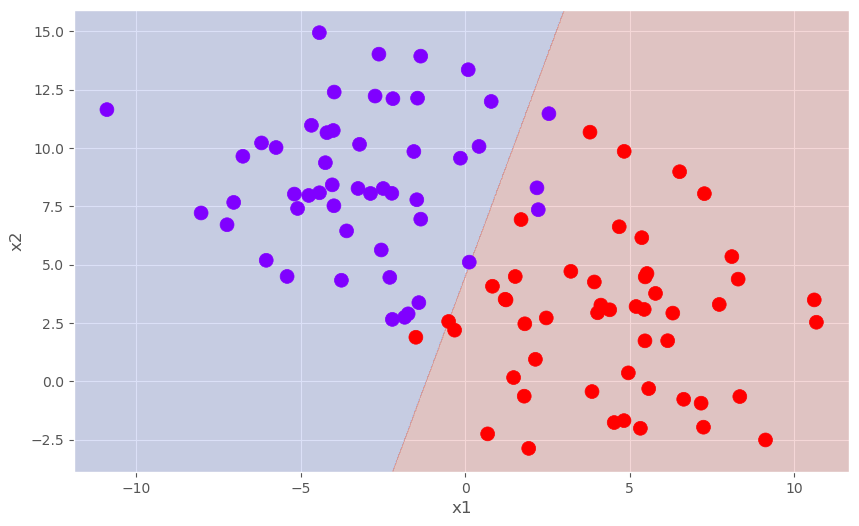

In [23]:
p = Perceptron(lr=0.1, n_iter=10)
p.fit(X, y)

In [24]:
accuracy_score(p.predict(X), y)

0.96

Not bad! We got 96% accuracy. This is expected since the data is <b>NOT lineraly seperable</b> and not much overlap.

Text(0, 0.5, 'x2')

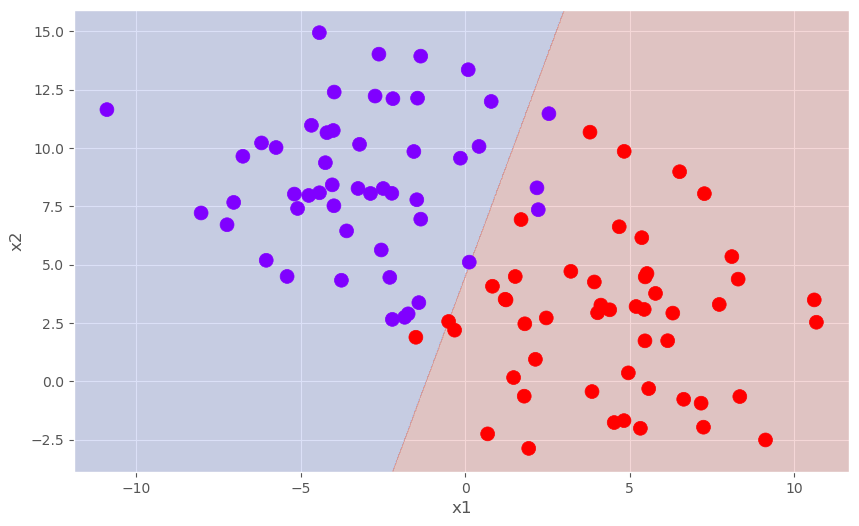

In [25]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(p, X, y)
plt.xlabel('x1')
plt.ylabel('x2')

Let's have a look at the learned weights:

In [26]:
p.weights

array([ 3.87695411, -1.0217691 ])

In [27]:
p.bias

4.600000000000001

In [28]:
accuracy_score(p.predict(X), y)

0.96

Fortunately, there are ways to make the perceptron more powerful and ultimately create
nonlinear decision boundaries. We will explore this in class.

---

<div class="alert alert-block alert-success">
    <center>
        <b>Excercise: Try that last experiment with datasets that <underline>overlap even more</underline>. <br>Hint: Using code like the above cells, increase cluster_std a small amount</b>
    </center>
</div>

---

In [29]:
# Add cells and your code here. Hint:  Very similar code to the above.

In [30]:
X, y = make_blobs(n_samples=100, centers=2,
                  cluster_std=3.25, random_state=42)  # std of 3.2 gives a very slight overlap
y = 2 * y - 1

Text(0, 0.5, 'x2')

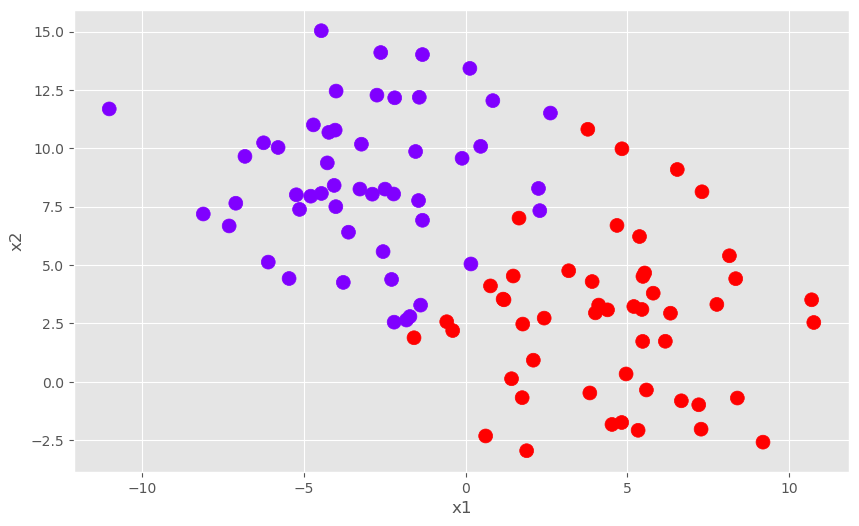

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap=plt.cm.get_cmap('rainbow', 3))
plt.xlabel('x1')
plt.ylabel('x2')

0.0
[ 2.68111548 -0.90184298]
0.4000000000000001
0.0
[ 2.9169691  -1.20111235]
0.8
0.0
[ 3.15900106 -0.65896679]
1.4
0.0
[ 2.7102045  -0.46833601]
1.9999999999999998
0.0
[ 1.9638726  -0.67048769]
2.6
0.0
[ 2.3800195  -1.00229635]
3.2000000000000006
0.0
[ 2.46452856 -1.60181968]
3.400000000000001
0.0
[ 1.64329613 -0.91516175]
4.000000000000001
0.0
[ 1.8775082  -1.02002217]
4.200000000000001
0.0
[ 2.0940823  -1.00046387]
4.400000000000001


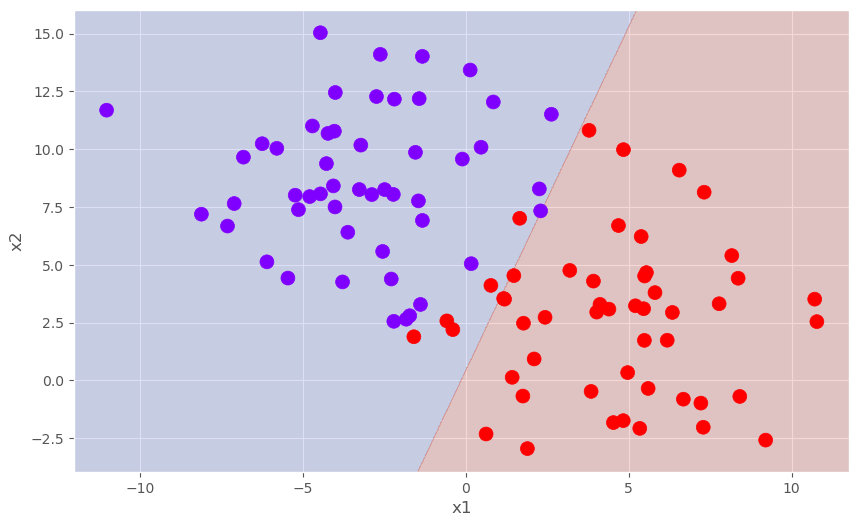

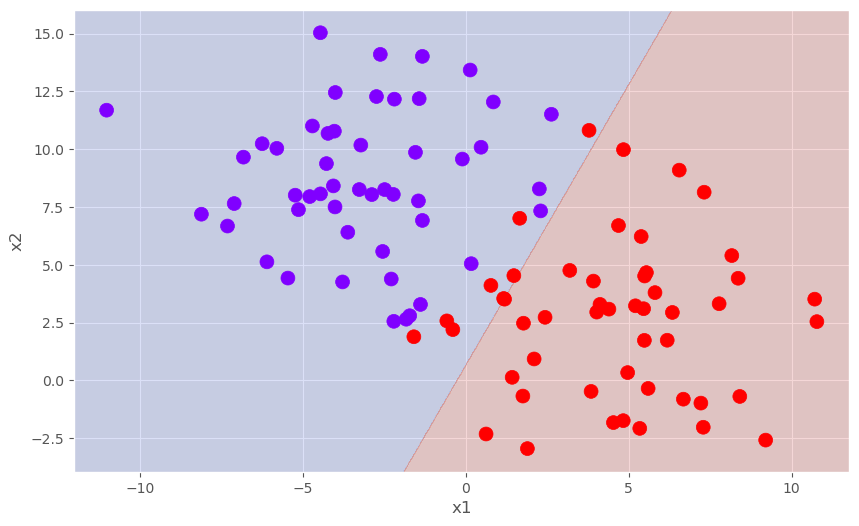

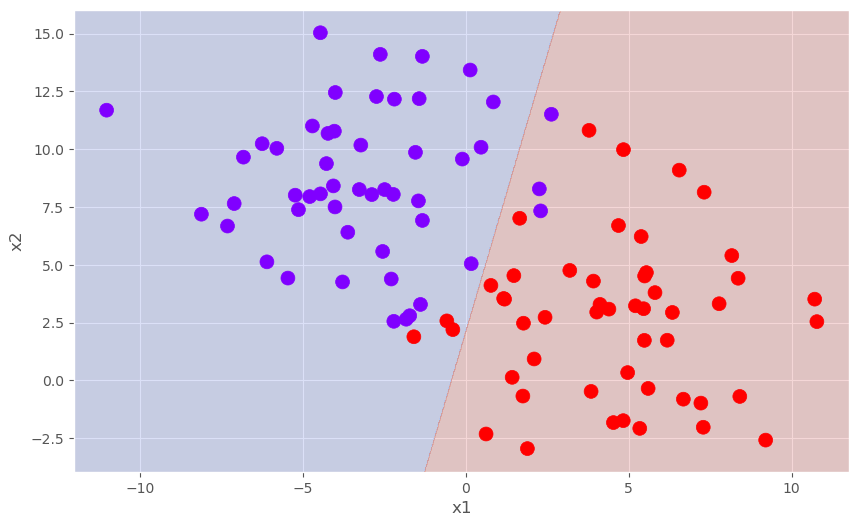

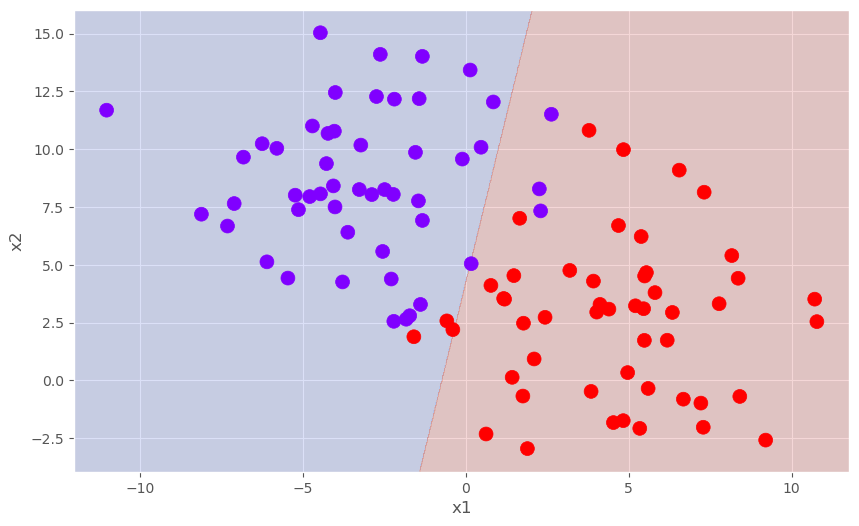

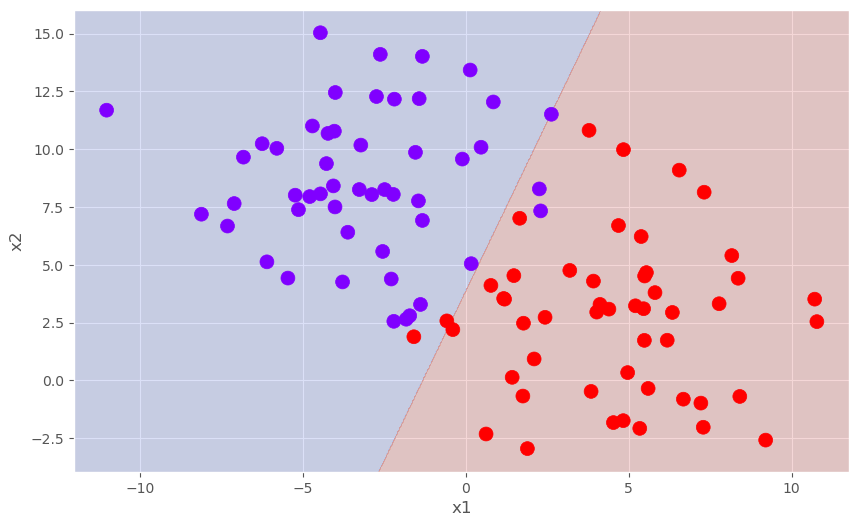

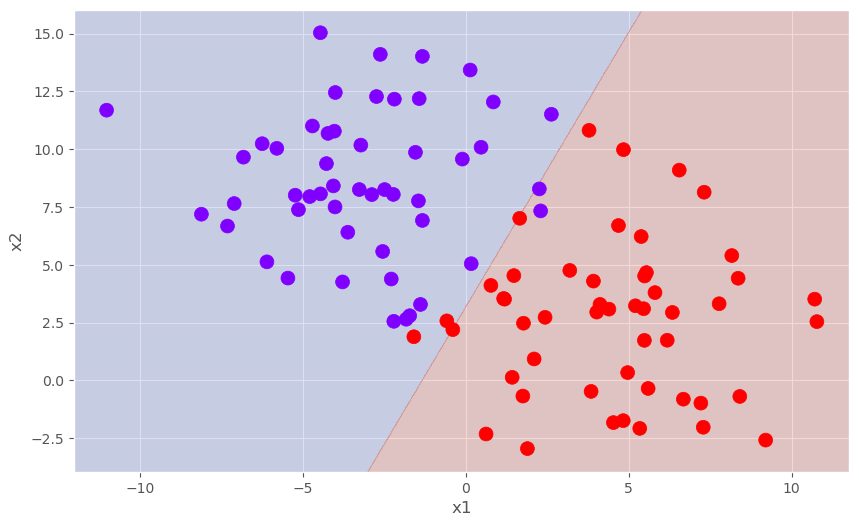

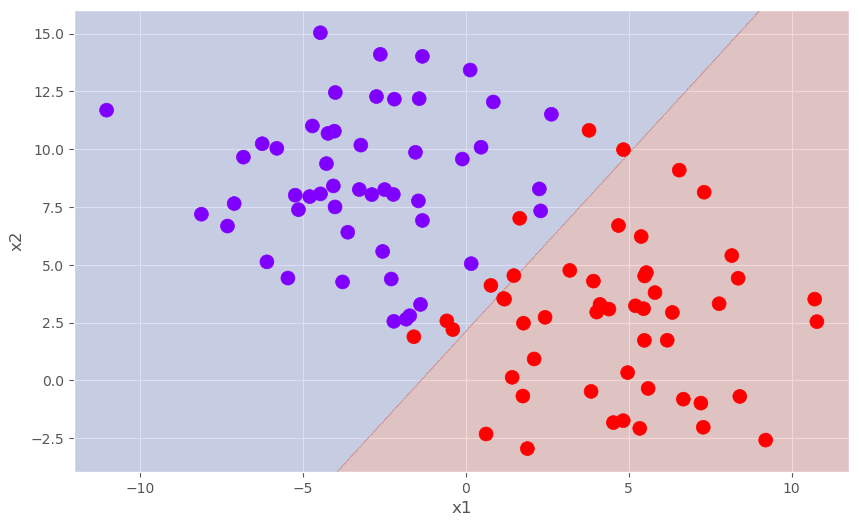

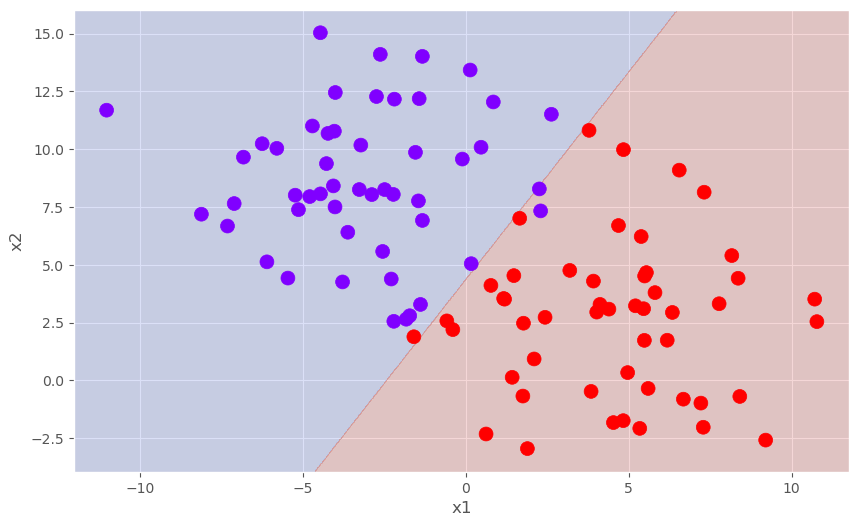

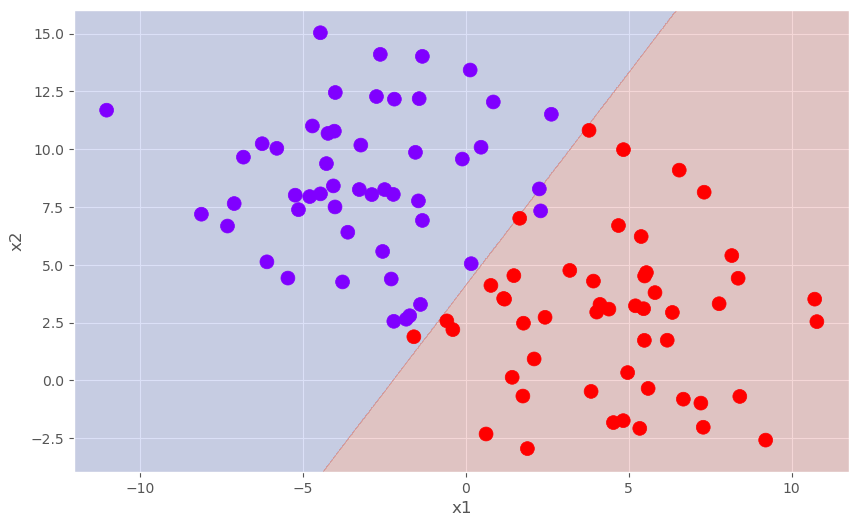

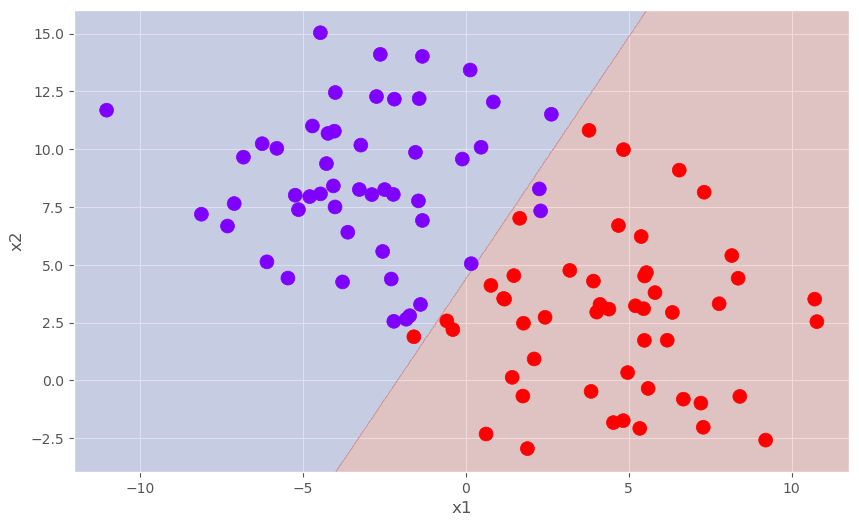

In [32]:
p = Perceptron(lr=0.1, n_iter=10)
p.fit(X, y)

In [33]:
accuracy_score(p.predict(X), y)

0.97

Text(0, 0.5, 'x2')

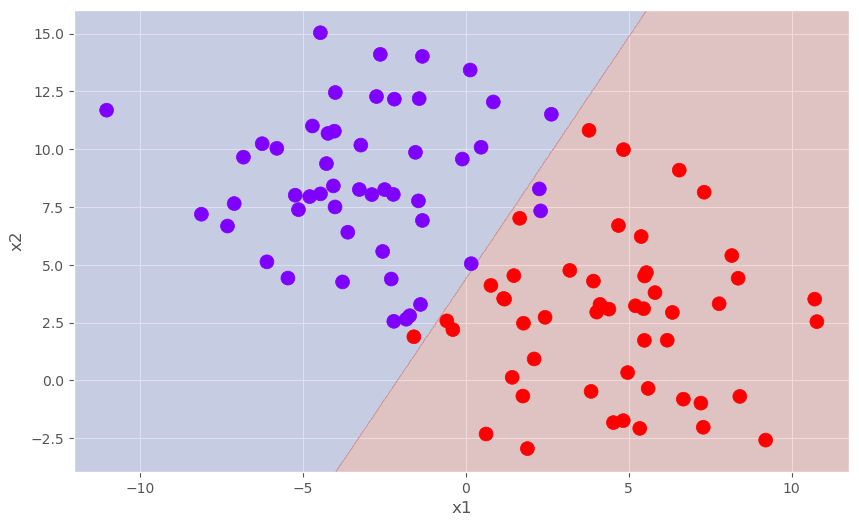

In [34]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(p, X, y)
plt.xlabel('x1')
plt.ylabel('x2')

In [35]:
p.weights

array([ 2.0940823 , -1.00046387])

In [36]:
p.bias

4.400000000000001

In [37]:
accuracy_score(p.predict(X), y)

0.97

---

<span style="font-size:1.5em;">
<div class="alert alert-block alert-success">
    <center>
        <b>Perceptron Learning Example for Logic AND</b>
    </center>
</div>
</span>

---

### AND Truth Table
---

```

AND Truth Table
 INPUT  OUTPUT
 X  Y    Out 
 -----------
 0  0     0
 0  1     0 
 1  0     0
 1  1     1

```


<img src="https://www.studytonight.com/computer-architecture/images/logic-gates-1.png" 
    style="float: left;" alt="XOR Truth Table" width="450">
</p>

<br><br><br><br><br><br><br><br><br>
#### Reference: https://www.studytonight.com/computer-architecture/logic-gates

---
### Create an AND dataset
---

In [38]:
y=np.array([-1,-1,-1,1])  # AND output.  We need 1 and -1 outputs for the Perceptron to work correctly
y

array([-1, -1, -1,  1])

In [39]:
X=np.array([[0,0], [1,0],[0,1], [1,1]])     #. AND inputs - all the choices of 1 and 0 for input
X

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

Text(0, 0.5, 'x2')

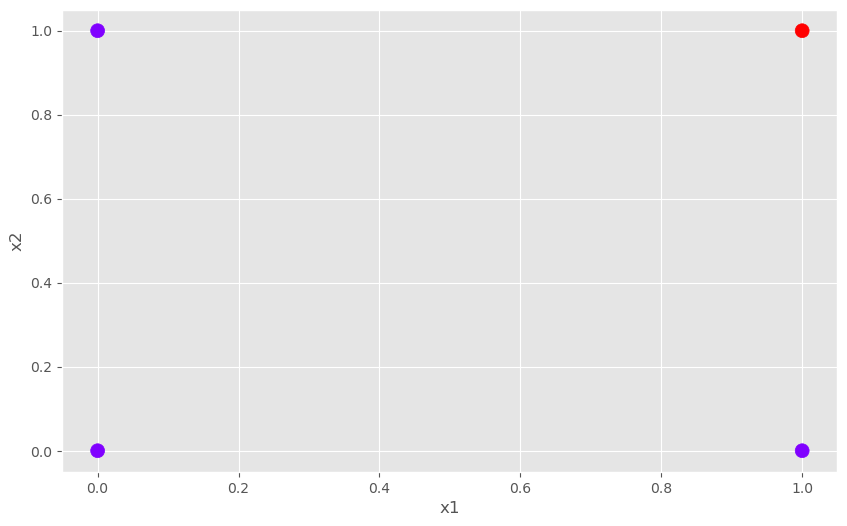

In [40]:
#y = 2 * y - 1  (since we are already 1 and -1 outputs, we don't need to do this on y)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap=plt.cm.get_cmap('rainbow', 2))
plt.xlabel('x1')
plt.ylabel('x2')

Above, we can clearly see the dataset are **lineraly seperable**. As seen in the above plot, there are only 4 output combinations for the two input AND function.
Three outputs are 0 (shown in blue), and one output is 1 (shown in red).  

## Evaluating the perceptron classifier on the AND dataset

0.2
[0.2 0.2]
0.0
0.2
[0.2 0.4]
-0.2
0.2
[0.2 0.4]
-0.4000000000000001
0.0
[0.2 0.4]
-0.4000000000000001
0.0
[0.2 0.4]
-0.4000000000000001


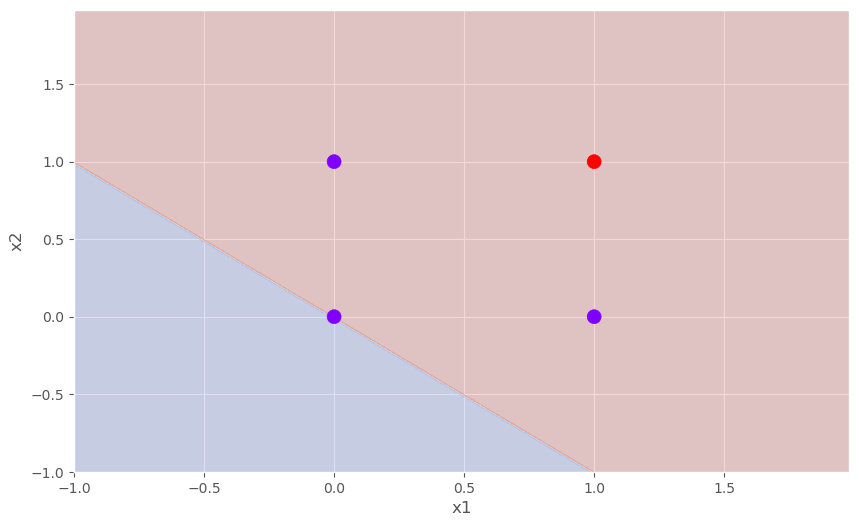

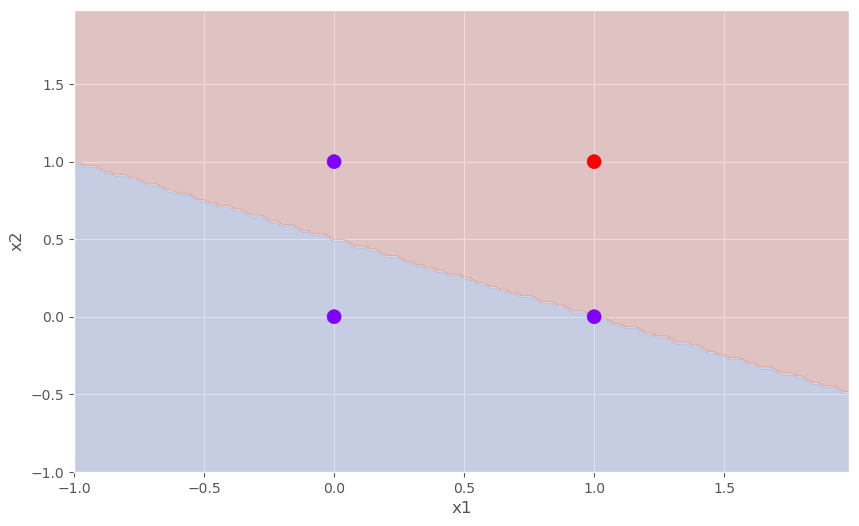

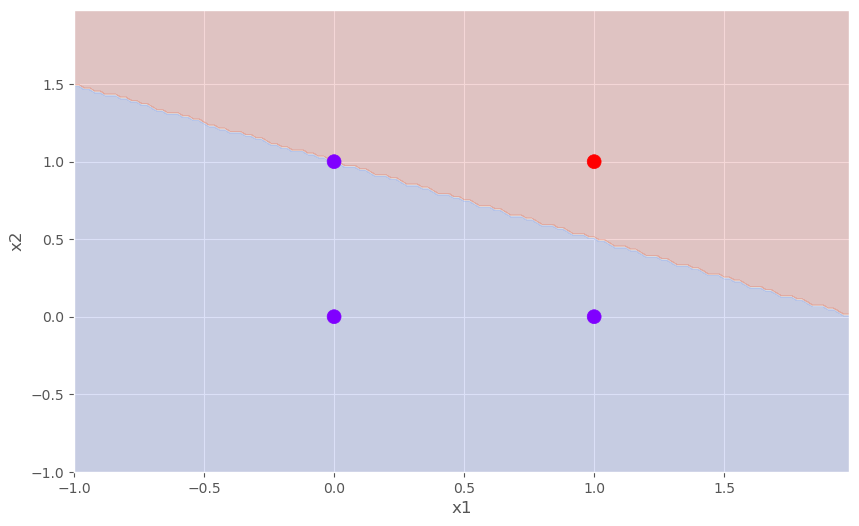

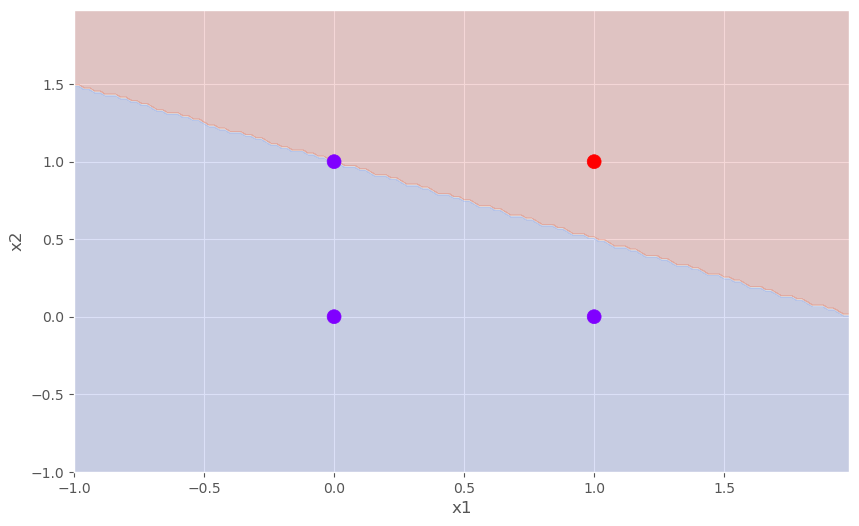

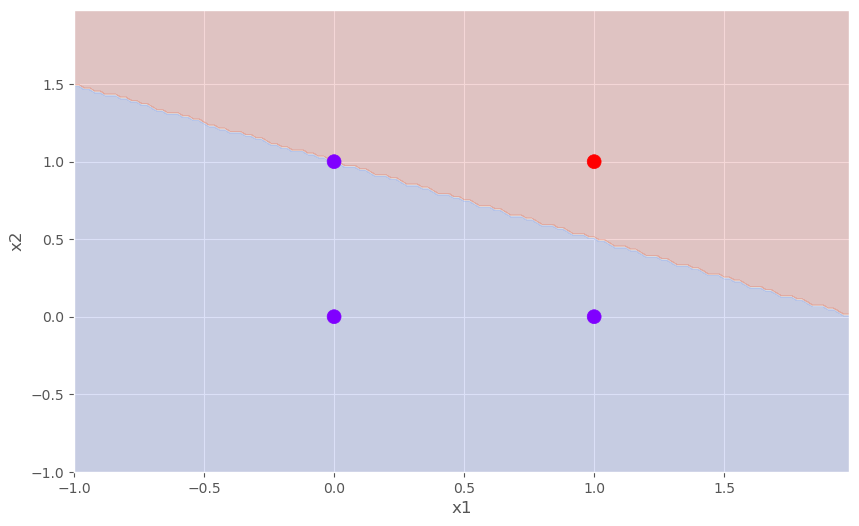

In [41]:
p = Perceptron(lr=0.1, n_iter=5)
p.fit(X, y)

In [42]:
accuracy_score(p.predict(X), y)

1.0

Great! We got 100% accuracy. This is expected since the data is <b>lineraly seperable</b>.

Lets plot the decision boundary. The line should 100% seperate the two **lineraly seperable** datasets.

Text(0, 0.5, 'x2')

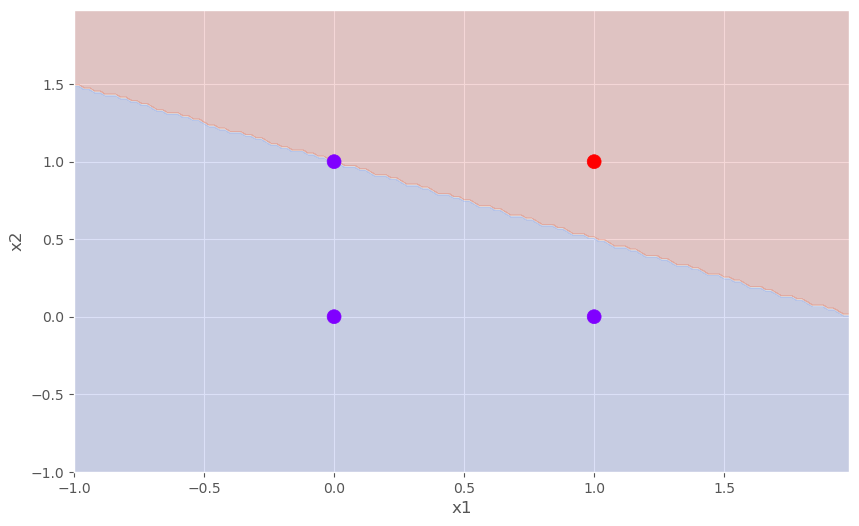

In [43]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(p, X, y)
plt.xlabel('x1')
plt.ylabel('x2')

In [44]:
p.weights

array([0.2, 0.4])

In [45]:
p.bias

-0.4000000000000001

In [46]:
accuracy_score(p.predict(X), y)

1.0

Great! We got 100% accuracy. This is expected since the data is <b>lineraly seperable</b>.

---

<span style="font-size:1.5em;">
<div class="alert alert-block alert-success">
    <center>
        <b>Excercise: Perceptron Learning Logic XOR function</b>
    </center>
</div>
</span>

---

##### Add code to create a Neural Network to predict XOR (there is plenty of code you can copy/modify in this Notebook to accomplish this).  Then, add a Markdown cell with a few comments about how the Perceptron learns (or doesn't learn) the XOR function.

### Create an XOR dataset

```

XOR Truth Table
 INPUT  OUTPUT
 X  Y    Out 
 -----------
 0  0     0
 0  1     1 
 1  0     1
 1  1     0

```


<p align="left">
    
##### Electronics Symbole and Truth Table

<img src="https://www.studytonight.com/computer-architecture/images/logic-gates-6.png" 
    style="float: left;" alt="XOR Truth Table" width="450">
</p>

<br><br><br><br><br><br><br><br><br>
#### Reference: https://www.studytonight.com/computer-architecture/logic-gates



---

<div class="alert alert-block alert-info">
    <center>
        <b>Your Turn: Fit the perceptron to AND data. Add Your Code Below!</b> 
    </center>
</div>

In [47]:
# Your code follows....
# It will be very similar to code above for the AND function.

In [48]:
y=np.array([-1,1,1,-1])  # AND output.  We need 1 and -1 outputs for the Perceptron to work correctly
y

array([-1,  1,  1, -1])

In [49]:
X=np.array([[0,0], [1,0],[0,1], [1,1]])     #. AND inputs - all the choices of 1 and 0 for input
X

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

Text(0, 0.5, 'x2')

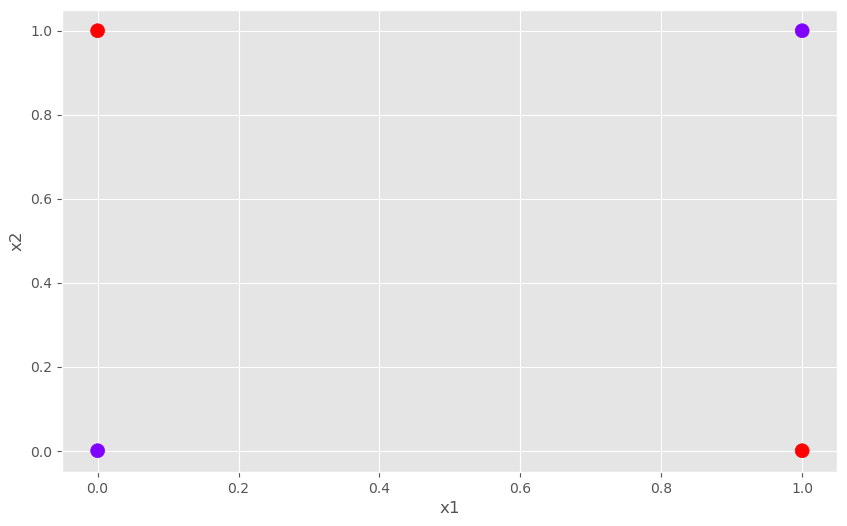

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap=plt.cm.get_cmap('rainbow', 2))
plt.xlabel('x1')
plt.ylabel('x2')

-0.2
[ 0.  -0.2]
-0.2
-0.2
[ 0.  -0.2]
0.0
-0.2
[ 0.  -0.2]
0.0
-0.2
[ 0.  -0.2]
0.0
-0.2
[ 0.  -0.2]
0.0
-0.2
[ 0.  -0.2]
0.0
-0.2
[ 0.  -0.2]
0.0
-0.2
[ 0.  -0.2]
0.0
-0.2
[ 0.  -0.2]
0.0
-0.2
[ 0.  -0.2]
0.0


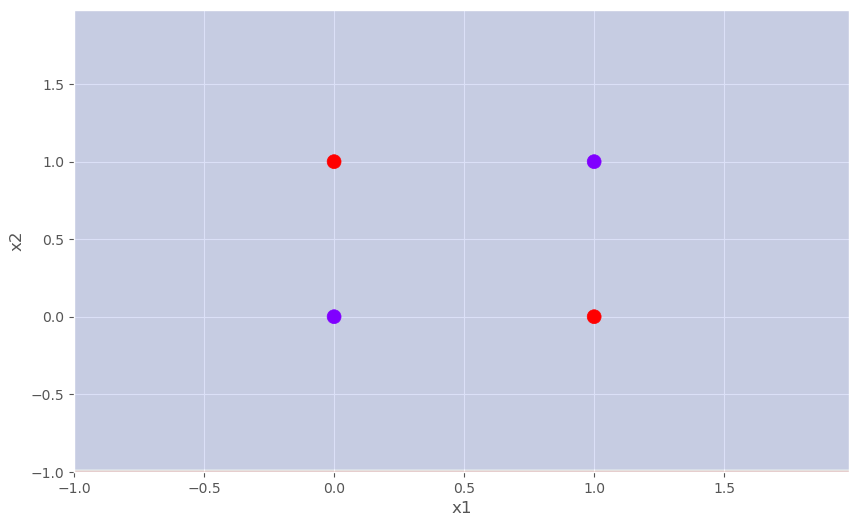

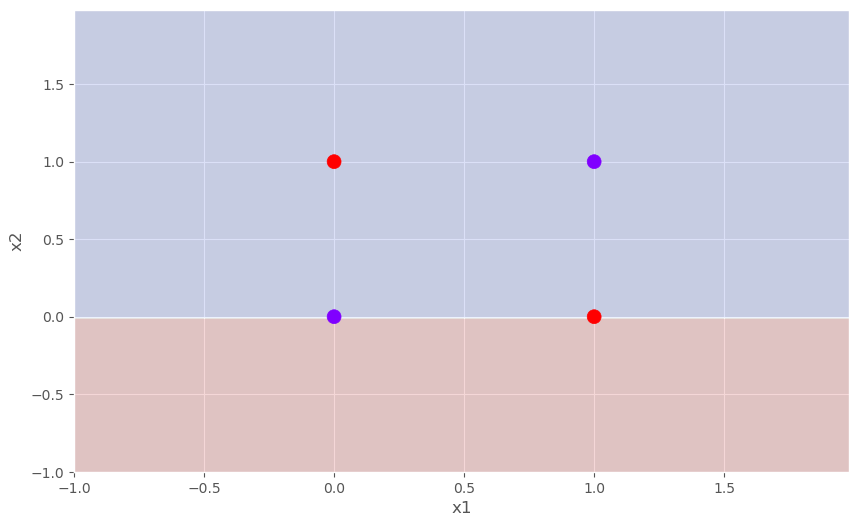

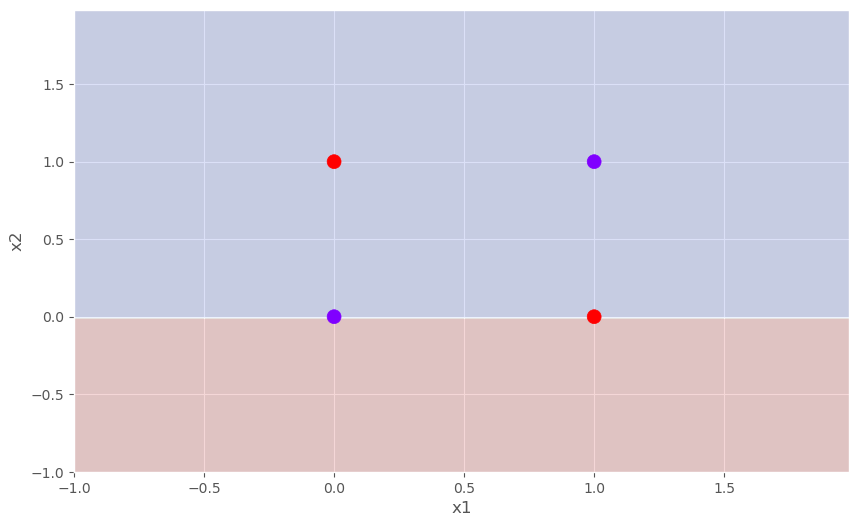

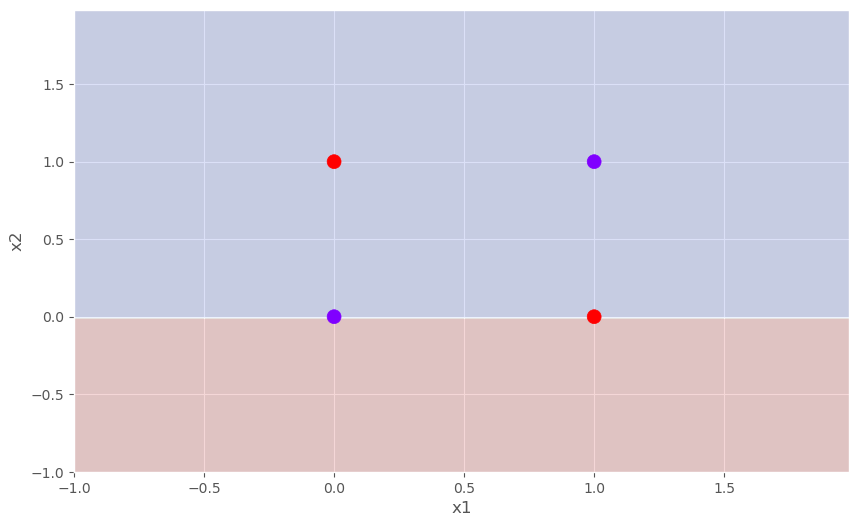

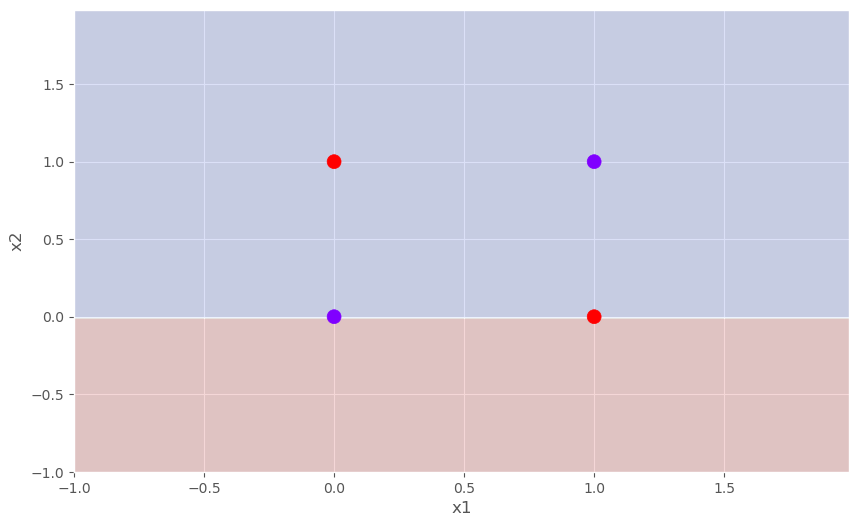

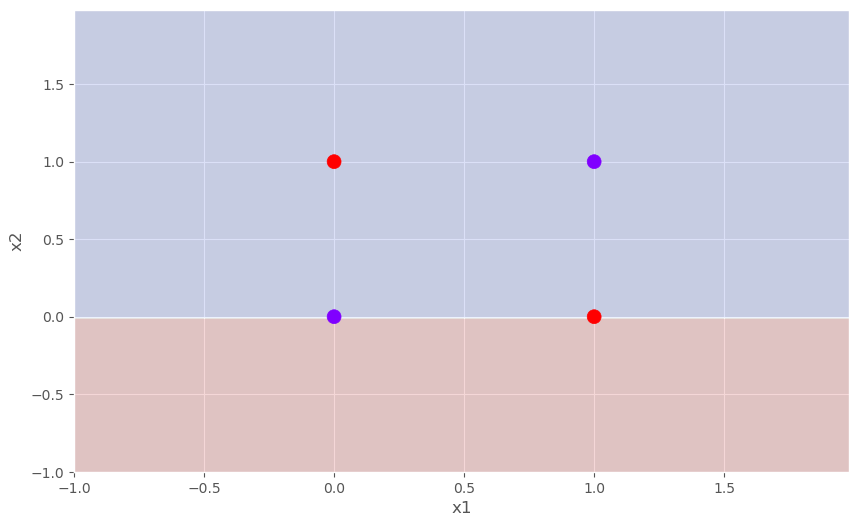

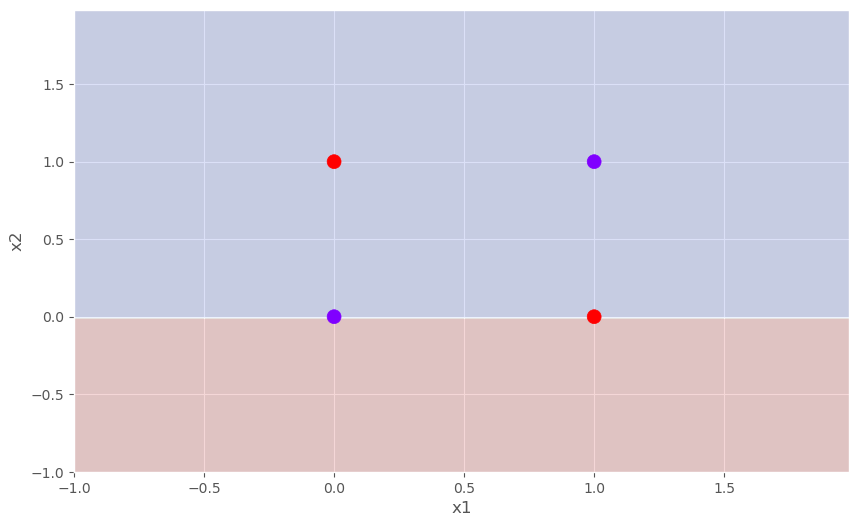

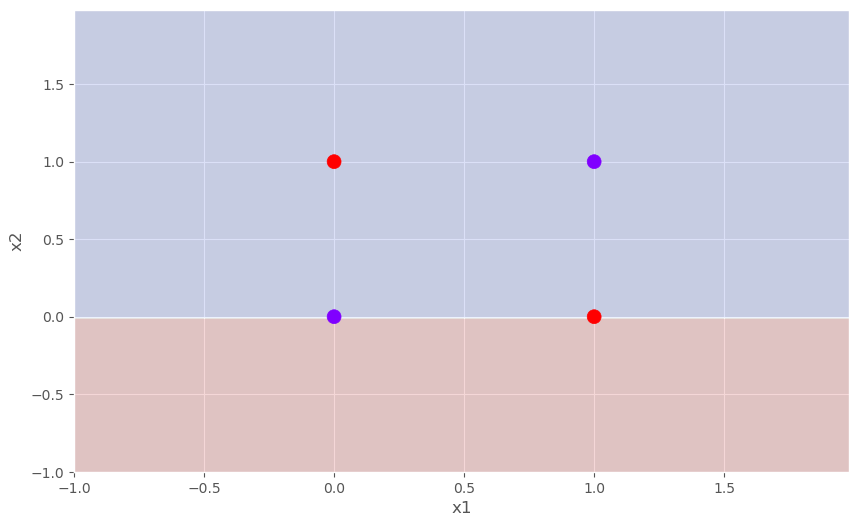

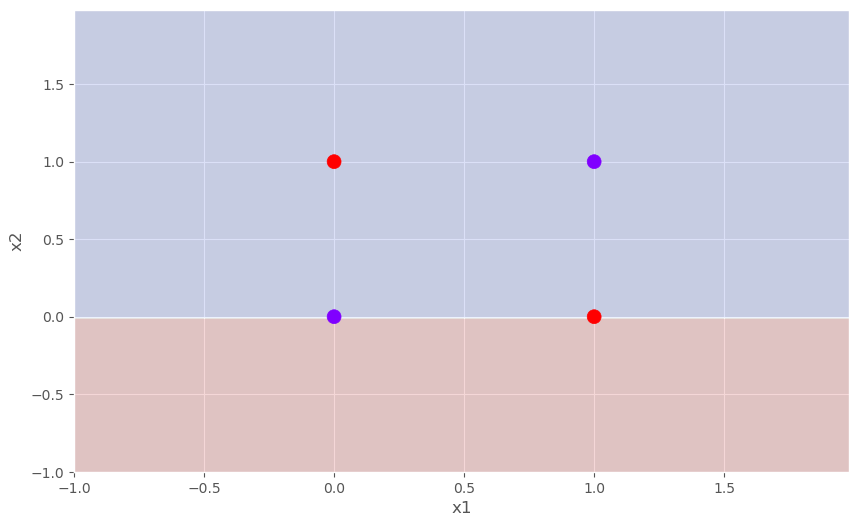

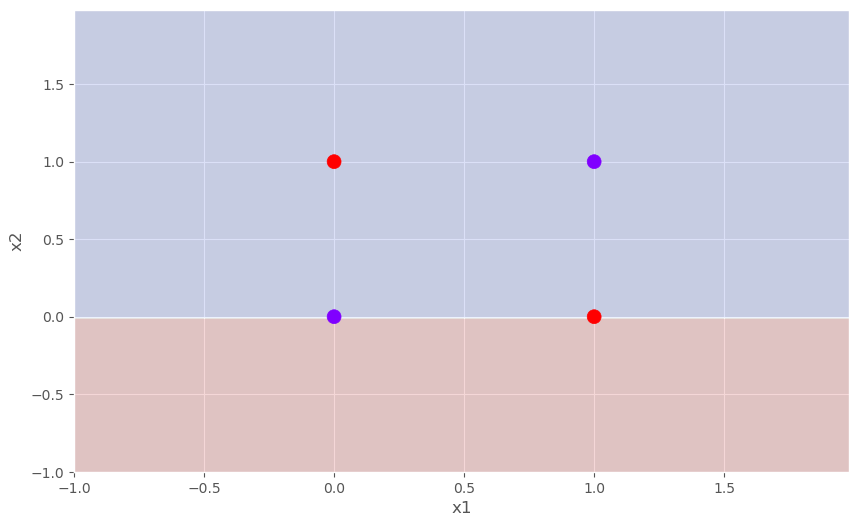

In [51]:
p = Perceptron(lr=0.1, n_iter=10)
p.fit(X, y)

In [52]:
accuracy_score(p.predict(X), y)

0.5

Text(0, 0.5, 'x2')

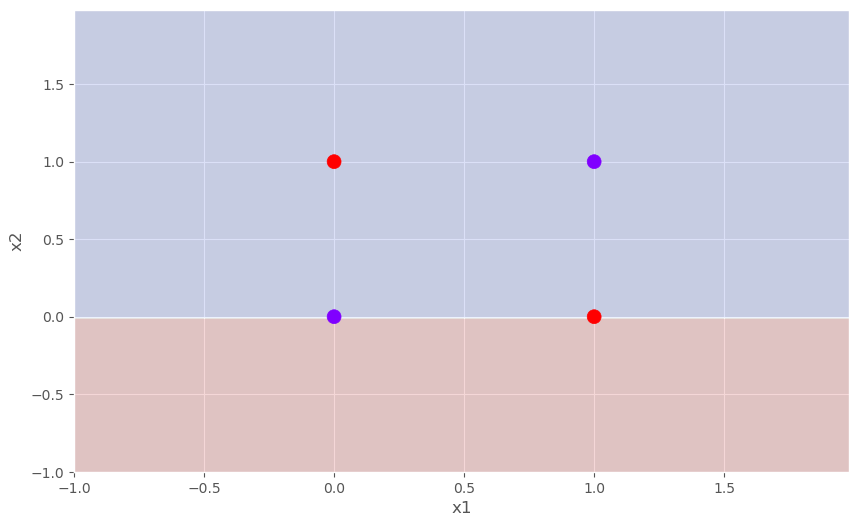

In [53]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(p, X, y)
plt.xlabel('x1')
plt.ylabel('x2')

In [54]:
p.weights

array([ 0. , -0.2])

In [55]:
p.bias

0.0

In [56]:
accuracy_score(p.predict(X), y)

0.5

The perceptron cannot learn the XOR function,As XOR doesn't contain linearly separable data. If we are taking a raw perceptron XOR values cannot be fit into a simple two dimensional plane but with multiple nodes and layers if we can complexify the perceptron then we can make it learn the XOR.

---

<div class="alert alert-block alert-success">
    <center>
        <b>Required Code: Reproducibility</b>
    </center> <br>
        <center>
        <b>Note: Simply run these cells. DO NOT change your environment!</b>
    </center>
</div>

---

## Reproducibility

Ensuring that our work is reproducible is the last and — arguably — most important step in any analysis. **As a rule, we shouldn't place much weight on a discovery that can't be reproduced**. As such, if our analysis isn't reproducible, we might as well not have done it.

Notebooks like this one go a long way toward making our work reproducible. Since we documented every step as we moved along, we have a written record of what we did and why we did it — both in text and code.

Beyond recording what we did, we should also document what software and hardware we used to perform our analysis. This typically goes at the top of our notebooks so our readers know what tools to use.

[Sebastian Raschka](http://sebastianraschka.com/) created a handy [notebook tool](https://github.com/rasbt/watermark) for this:

In [57]:
# Students - Include this cell in all your notebooks

#Be sure waterwark package is installed. For example:
!conda install -c conda-forge watermark
%load_ext watermark
import sys
!conda install --yes --prefix {sys.prefix} watermark

# You can review the watermark commands with:
# Just uncomment out the following line
%watermark?

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done
Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


## Note:  Be sure to put your name in the cell below (No Spaces Allowed!!)

In [58]:
# Students - Include this cell in all your notebooks

%watermark

print("\n===========================")

# NOTE:  Put your name below:
%watermark -a 'Srijesh_Reddy' -nmv --packages numpy,sklearn,matplotlib,watermark,tensorflow

Last updated: 2022-12-04T20:44:37.662366-06:00

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.6.0

Compiler    : Clang 12.0.0 
OS          : Darwin
Release     : 18.7.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit


Author: Srijesh_Reddy

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.6.0

numpy     : 1.21.5
sklearn   : 1.0.2
matplotlib: 3.5.3
watermark : 2.3.1
tensorflow: 2.9.1

Compiler    : Clang 12.0.0 
OS          : Darwin
Release     : 18.7.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit



In [59]:
import sys
sys.executable

'/Users/srijesh/opt/anaconda3/envs/tf2/bin/python'

In [60]:
import tensorflow as tf

In [61]:
tf.__version__

'2.9.1'

In [62]:
!pip show watermark

Name: watermark
Version: 2.3.1
Summary: IPython magic function to print date/time stamps and various system information.
Home-page: https://github.com/rasbt/watermark
Author: Sebastian Raschka
Author-email: mail@sebastianraschka.com
License: newBSD
Location: /Users/srijesh/opt/anaconda3/lib/python3.9/site-packages
Requires: ipython
Required-by: 


In [63]:
!conda info tensorflow


tensorflow 1.10.0 eigen_py27hf93ee88_0
--------------------------------------
file name   : tensorflow-1.10.0-eigen_py27hf93ee88_0.conda
name        : tensorflow
version     : 1.10.0
build string: eigen_py27hf93ee88_0
build number: 0
channel     : https://repo.anaconda.com/pkgs/main/osx-64
size        : 4 KB
arch        : None
constrains  : ()
legacy_bz2_md5: 00d6b16496b6d169fcb0b983ce59ec94
legacy_bz2_size: 4356
license     : Apache 2.0
license_family: Apache
md5         : 74b1fe2132a6f9205b1ebcdd00ea999c
platform    : None
sha256      : 2ff5c74234667eaf2eb8930e93f6fc469320d50648cb4403b01c609d724e46ea
subdir      : osx-64
timestamp   : 1535138693663
url         : https://repo.anaconda.com/pkgs/main/osx-64/tensorflow-1.10.0-eigen_py27hf93ee88_0.conda
dependencies:
    _tflow_select ==2.2.0 eigen
    python 2.7.*
    tensorboard >=1.10.0,<1.11.0
    tensorflow-base ==1.10.0 eigen_py27h4f0eeca_0

tensorflow 1.10.0 eigen_py35h5ac2770_0
--------------------------------------
file name   :

<div class="alert alert-block alert-info">
    <center>
        <b>Run Statistics</b> 
    </center>
</div>

In [64]:
t1=dt.datetime.today()
t1-t0

datetime.timedelta(seconds=159, microseconds=700585)

In [65]:
t1=dt.datetime.today()
duration=t1-t0
print("Total Time = %.1f" % duration.total_seconds(), "seconds, or")
mins = int(duration.total_seconds()/60.0)
secs = duration.total_seconds()-mins*60.0
print("Total Time =",mins, "minutes and %.1f" % secs, "seconds")

print("\nMy Name is:", name)
print("\nIt is now: ",dt.datetime.today().strftime("%m/%d/%Y %I:%M:%S %p"))

Total Time = 159.7 seconds, or
Total Time = 2 minutes and 39.7 seconds

My Name is: Srijesh Reddy Yarram

It is now:  12/04/2022 08:44:54 PM


<br>
<div class="alert alert-warning">
    <center> The end. </center>
</div>